In [6]:
import numpy as np
import pandas as pd
import scanpy as sc

In [7]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')

scanpy==1.8.2 anndata==0.7.8 numpy==1.20.3 scipy==1.7.3 pandas==1.3.5 scikit-learn==1.0.1 statsmodels==0.13.1 python-igraph==0.9.8 louvain==0.7.1 pynndescent==0.5.5


In [8]:
results_file = 'write/pbmc3k.h5ad'  # the file that will store the analysis results

In [9]:
adata = sc.read_10x_mtx(
    'data/Self-renewing-EEO/treated_day6/',  # the directory with the `.mtx` file
    var_names='gene_symbols',                # use gene symbols for the variable names (variables-axis index)
    cache=True)                              # write a cache file for faster subsequent reading

... reading from cache file cache/data-Self-renewing-EEO-treated_day6-matrix.h5ad


In [10]:
adata.var_names_make_unique()  # this is unnecessary if using `var_names='gene_ids'` in `sc.read_10x_mtx`

In [11]:
adata

AnnData object with n_obs × n_vars = 6794880 × 33538
    var: 'gene_ids'

Preprocessing

normalizing counts per cell


/Users/franziskakoch/PycharmProjects/Organoids_sc_WS2122/venv/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:182: UserWarning: Some cells have zero counts
  warn(UserWarning('Some cells have zero counts'))


    finished (0:00:01)


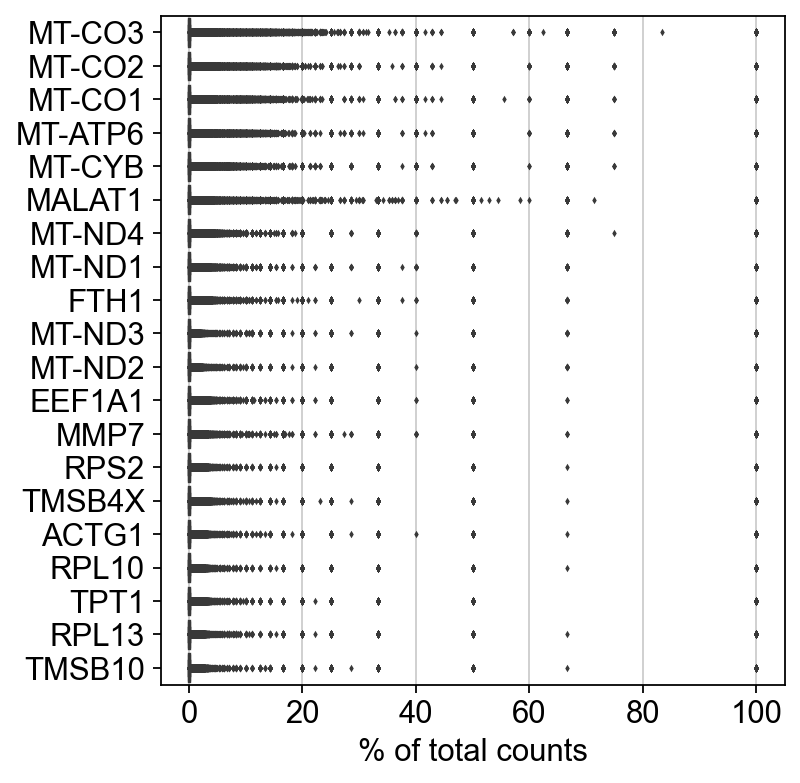

In [12]:
sc.pl.highest_expr_genes(adata, n_top=20, )

In [30]:
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

filtered out 926 cells that have less than 200 genes expressed
